<a href="https://colab.research.google.com/github/monbruin61/Pocket-Racers/blob/main/Intro_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import os
import random
from tensorflow.keras import Model # if only machine learning were this easy :P

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
#import any other libraries you want here:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Part 1: A CNN with CIFAR10
**Remember to change your runtime type to GPU if you value time!**

First, let us grab our testing, training, and validation data. We usually don't use K-fold cross validation for neural networks because of how long it takes, so we just need one validation set.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# YOUR TURN:
# Currently the x data is represented by uint8 between 0 and 255.
# Convert it to a float32 and scale it down to between 0 and 1.

x_train = x_train.astype('float64')/ 255.0
x_test = (x_test.astype('float64'))/ 255.0 #x_test but btwn 0 and 1

# Let's grab some validation data from our training dataset!
# 5000 datapoints should be enough.
# Remember to remove them from your training data!
#how exactly are you supposed to choose the data?
dummy, dummy2 = shuffle(x_train, y_train)

x_val = dummy[:5000]
y_val= dummy2[:5000]

print(x_val.shape)

x_train = dummy[5000:]
y_train = dummy2[5000:]
print(x_train.shape)

# This stuff will throw an error until the above is completed.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(45000, 32, 32, 3)
(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)


The CIFAR10 Dataset we will be playing with first is a dataset of 32x32 rgb images that fall into one of 10 catagories. Take a look at what an image may look like.

[3]


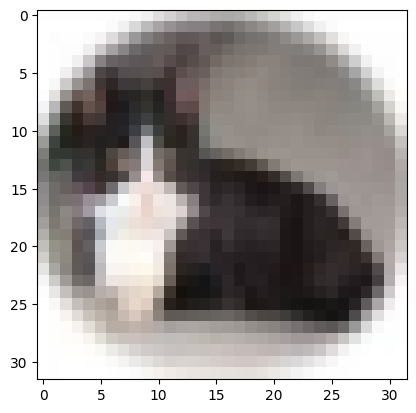

In [ ]:
plt.imshow(x_train[0])
print(y_train[0])

## **Designing our Model**

Our data is already ready to use (gotta love Keras)! We can go ahead and define our first model here.

In [ ]:
input_shape = x_train[0].shape

# First, we declare the size of our inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs)

# This is where our layers go. Add/modify the layers of your
# neural network here.
# Note the basic syntax for defining this network. Each layer
# is defined by calling a function on the layer before; the functions
# themselves and their parameters are outlined in the tf.keras docs

#You should customize and experiment with your architecture, but if you want
#a (somewhat arbitrary) place to start, try the following: (2D)
    # 5x5 convolutional layer with 10 output channels
    #we want padding bc our dimensions aren't right?? or maybe pad later
    #do I want to use relu yet? if so, make sure to write it out

    #this is the general procedure, could add more convolutions/maxpools
peep = tf.keras.layers.Conv2D(10, 5, strides=(1, 1), padding='valid', data_format=None, groups=1, activation='relu',
use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(inputs)
    # maxpool 2
poop = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='valid')(peep)
    # 3x3 convolution with 20 output channels
paap = tf.keras.layers.Conv2D(20, 3, strides=(1, 1), padding='valid', data_format=None, groups=1, activation='relu',
use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(inputs)
    # Batchnorm
puup = tf.keras.layers.BatchNormalization()(paap)
    # Maxpool 2
piip = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='valid')(puup)
    # Flatten
pllp = tf.keras.layers.Flatten()(piip)
    # Dropout = 0.5
pjjp = tf.keras.layers.Dropout(0.5)(pllp)
    # FC layers with 128 neurons
pwwp = tf.keras.layers.Dense(128, activation = 'relu')(pjjp)
    # Batchnorm
phhp = tf.keras.layers.BatchNormalization()(pwwp)
    # FC layers with 10 neurons
pssp = tf.keras.layers.Dense(10, activation = 'relu')(pjjp)
print(pssp)

# x = Conv2D(1, 1)(inputs)
x = Flatten()(pssp)

# Make sure there are 10 outputs!
x = Dense(10, activation = 'softmax')(x)


model = tf.keras.Model(inputs=inputs, outputs=x)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")


## **Loss and Optimization**

When building a model in this way, we must compile it with an optimizer and loss function.

Take a look at the different optimizers that are offered and select one that can be used. You may want to play with the learning rate, weight decay, or other hyperparameters.

Then figure out what loss function we want. In order to figure this out, you should look at the format of our labels, as well as what kind of problem we are trying to solve (classification). The from_logits parameter tells the function if you are passing it probabilities (like those from the softmax function). If you are, then from_logits=False, otherwise, if you are passing it raw values,  from_logits=True.

If you are unsure how or what is wanted, send a message to us and we can work through it together

In [ ]:
#Select an appropriate keras optimizer and adjust its parameters: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#Select an appropriate keras loss function. remember to set from_logits=True if your model does not pass your outputs
#through a softmax function: https://www.tensorflow.org/api_docs/python/tf/keras/losses
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt,
              loss=loss_func,
              metrics=['accuracy'] #metrics tells the model what to print while we are training. We would like to see the accuracy
              )

##**Training our Model**
Training in tf can be really easy! Once you have built your model, you just need to call .fit() on your model to train. (You can even tell it what parameters you want!)

YOUR TASK HERE:
*   set the number of epochs
*   set the batch size
*   test the model on validation data each epoch
*   See how low you can get your validation accuracy by changing the architecture of your model and tuning hyperparameters


**Optional:**
There are a bunch of customizations you can add to your training function. If you don't know how long you should train for, look into using **callbacks** and in particular **EarlyStopping**!

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size= 64, validation_data = (x_val,y_val))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


704/704 [==============================] - 8s 5ms/step - loss: 1.7697 - accuracy: 0.3672 - val_loss: 1.5752 - val_accuracy: 0.4460
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 1.4068 - accuracy: 0.4916 - val_loss: 1.5933 - val_accuracy: 0.4416
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 1.2653 - accuracy: 0.5467 - val_loss: 1.2974 - val_accuracy: 0.5318
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 1.1844 - accuracy: 0.5758 - val_loss: 1.2017 - val_accuracy: 0.5656
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 1.1353 - accuracy: 0.5946 - val_loss: 1.3609 - val_accuracy: 0.5146
Epoch 6/10
704/704 [==============================] - 4s 6ms/step - loss: 1.1020 - accuracy: 0.6070 - val_loss: 1.2707 - val_accuracy: 0.5466
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0654 - accuracy: 0.6185 - val_loss: 1.1796 - val_accuracy: 0.5744
Epoch 8/10
704/70

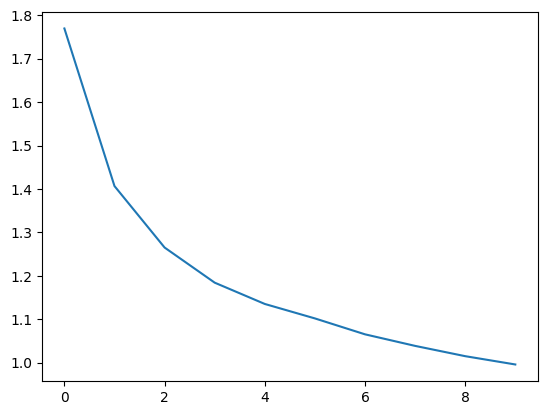

In [ ]:
# Take a look at your training history
plt.plot(history.history['loss'])

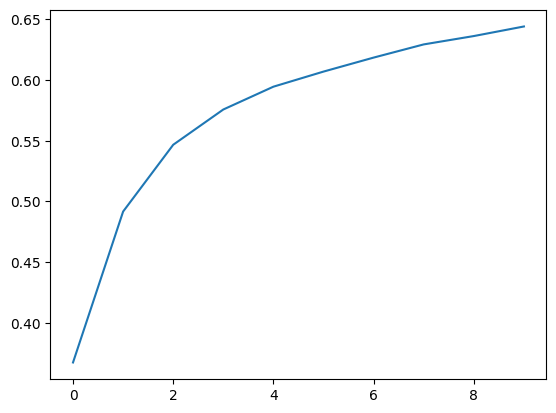

In [ ]:
plt.plot(history.history['accuracy'])

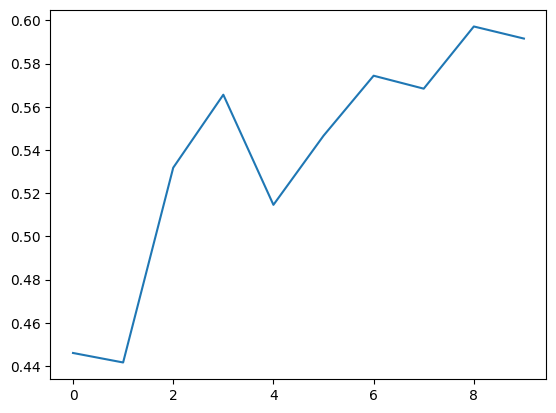

In [ ]:
plt.plot(history.history['val_accuracy'])

Now lets see how our model did by testing it on our test data. We could do this manually with numpy as we learned in the last lab, or we can use keras metrics to do it for us.

In [ ]:
# Now that our model is trained, this is how to pass data through it to get predictions.
# training=False is used to tell the program how to handle layers that behave differently
# during training and testing (like dropout and batchnorm)
pred = model(x_test, training=False)

# Select the metric you want for testing accuracy. It should look very similar to your loss function
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
test_acc = tf.keras.metrics.SparseCategoricalAccuracy()

# Comparing your predictions, make sure that pred.shape=(10000, 10) and y_test.shape=(10000, 1)
test_acc.reset_states()
test_acc(y_test, pred)
print(test_acc.result())

tf.Tensor(0.5917, shape=(), dtype=float32)


#Part 2: Playing Card Identification with CNNs
On to more of a challenge. This will require a lot more preprocessing, and the larger image size will require more optimizations for speed and memory.

In [ ]:
#we are unzipping our data locally so that we will not need to go to our google drive to collect our data
from zipfile import ZipFile

path = "/content/drive/MyDrive/Copy of Copy of card_data.zip"
with ZipFile(path, 'r') as zObject:
    zObject.extractall(
        path="/content/card_data")

##Cleaning our Data
Take a second to explore what the data looks like. **cards.csv** contains information for all the data. The columns we care about are:
*   class index: a number between 0-53 which encodes the card type
*   filepaths: the path to the image for that datapoint
*   data set: which dataset (train, valid, or test) that datapoint should be included in

There are a few issues the the current format of the data:
*   It is in jpeg format. This means it is compressed and it would be too costly to decompress the data every time we want to get a datapoint while training. We will have to store the data in a different format
*   At least one of the paths in the csv is invalid
*   images are currently uint8s between 0 and 255

At the end of cleaning the data, you should have the following
*   All jpg files have been deleted and replaces with npy or npz files
*   The cards.csv should only contain datapoints with valid filepaths
*   The filepaths in cards.csv should all point to npy or npz files
*   All images are float32 between 0 and 1

You can implement this however you would like, but we offer you here some pseudo code and helpful functions

In [ ]:
#Load the csv file into a pandas dataframe or numpy array (I used pandas)

dataset = pd.read_csv("/content/card_data/cards.csv")
df = pd.DataFrame(dataset)
print(df)
 #okok igetitigetit, so print(row['filepaths']) isnt a good way to check bc it references df.iterrows' dataframe which im
#guessing is a copy of the original df. Ohhh okok i see what's happening. So the file saved locally will be saved as npy, but the file being
#read from the zip will always be jpg. Bc we're reading from the zip each time we run this cell AFTER the first run, the file stored locally
#will be npy while the dataframe created will always be jpg which cannot be avoided. So the solution...MOVE THE FOR LOOP TO A DIFFERENT CELL

#ok nvm, my assertment is wrong, I gotta ask where I cn validate
#to see what the filepath looks like locally.

      class index                   filepaths         labels card type  \
0               0  train/ace of clubs/001.jpg   ace of clubs       ace   
1               0  train/ace of clubs/002.jpg   ace of clubs       ace   
2               0  train/ace of clubs/003.jpg   ace of clubs       ace   
3               0  train/ace of clubs/004.jpg   ace of clubs       ace   
4               0  train/ace of clubs/005.jpg   ace of clubs       ace   
...           ...                         ...            ...       ...   
8150           52   valid/two of spades/1.jpg  two of spades       two   
8151           52   valid/two of spades/2.jpg  two of spades       two   
8152           52   valid/two of spades/3.jpg  two of spades       two   
8153           52   valid/two of spades/4.jpg  two of spades       two   
8154           52   valid/two of spades/5.jpg  two of spades       two   

     data set  
0       train  
1       train  
2       train  
3       train  
4       train  
...       ...  

In [ ]:
#loop through your dataframe. For each element:
  #make sure the filepath is valid. You can use either try/except blocks or os.path.exists()


    #if it does not, remove that item from the csv
for index, row in df.iterrows():
    file_path = row['filepaths']
    real_path = os.path.join("/content/card_data", file_path)
    #so if it says it doesn't have attribute "" that means the libraries went lebron so reload the 1st cell
    if os.path.exists(real_path):
      image = tf.io.decode_jpeg(tf.io.read_file(real_path))
      image = image/255
      new_path = file_path[:-4]
      np.save(os.path.join("/content/card_data", new_path), image.numpy())
      os.remove(real_path)
      # df.at[index, 'filepaths'] = f"/content/card_data/{index}.npy"
      #so just replace all the jpgs with npys
      #df.at[index, 'filepaths'] = row['filepaths'][0:row['filepaths'].find('.')] + 'npy'
      df.loc[df['filepaths'] == row['filepaths'], 'filepaths'] = row['filepaths'][0:-4]+'.npy'
    else:
      df.drop(index, inplace=True)

  #load the image as a numpy array/tensorflow tensor you may want to use: tf.io.decode_jpeg(tf.io.read_file(PATH))
  #do necessary modifications
  #save the modified image as a npy or npz file using np.save
updated_csv_path = "/content/card_data/updated_data.csv"
df.to_csv(updated_csv_path, index = False)
  #remove the jpg file using os.remove
  #update filepath in the csv

#save the updated csv with .to_csv() or savetxt()

8154
ace of clubs
[[1.         1.         0.9882353  ... 0.94509804 0.9529412  0.95686275]
 [1.         1.         0.9882353  ... 0.7254902  0.7529412  0.90588236]
 [1.         0.9882353  0.99215686 ... 0.7411765  0.7372549  0.7372549 ]
 ...
 [1.         1.         0.9882353  ... 0.95686275 0.95686275 0.95686275]
 [0.99215686 0.99215686 1.         ... 0.9843137  0.9764706  0.99215686]
 [0.99215686 0.99215686 1.         ... 1.         1.         1.        ]]


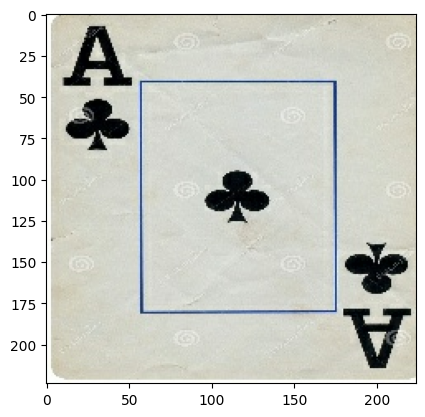

In [ ]:
#do some investigation to make sure the specifications above have been met
#print(df)
print(len(df))
dataset2 = pd.read_csv("/content/card_data/updated_data.csv") #if we do this, then we rlly don't need to update the og cell or csv file/dataframe...
df2 = pd.DataFrame(dataset2)
#print(df2)
print(df2.iat[3, 2])
#so i didn't make sure all the images were float32s yet...
img = np.load(os.path.join("/content/card_data", df2.iat[3, 1]))

print(img[:,:,2])
plt.imshow(img)

#so 0 rearranges as the 2d arrays
#1 flips the elements within each 2d array across the x axis
#2 flips the elements within each 2d array across the y axis

##Creating our dataset
tf datasets are useful tools that can be passed to our models to train on instead of raw data. Since we are working with a lot of large images (and will soon be working with even larger videos), we will not be able to hold all of our data in one array, so we need to set up a framework to get the data we want when we want it. To do this we will set up a class that works as a python generator, which we can then use to build a dataset, which we can use to train our model.


In [ ]:
#Creates a generator for our dataset
class PhotoDatasetGenerator:
    def __init__(self, set_type, root, **augmentations):
      #what do we do with set_type?
        """
        inputs:
          set_type: one of 'train' 'test' 'valid' indicating what data we want from our csv
          root: the root path to card_data folder
          **augmentations:
            - crop: an int indicating the height and width we should crop our images to. If
                False then do no cropping
            - flip_ho: bool indicating if we should do horizontal flipping
            - flip_vert: bool indicating if we should do vertical flipping

        creates (at least) the following members:
          self.root: same as passed root
          self.csv: a np array or pd datafram from our cleaned cards.csv file. This should include
            only data from the appropriate set (dictated by set_type) and should also be shuffled
          self.augmentations: a dictionary that indicates what data augmentations we are currently using
        """
        #should we add another parameter to the constructor? Yeah we could just grab the csv file but seems unorganized...
        #set root
        self.root = root

        #set self.csv
        self.csv = pd.read_csv("/content/card_data/updated_data.csv") #if we do this, then we rlly don't need to update the og cell or csv file/dataframe...
        self.csv = self.csv[self.csv['data set'] == set_type]
        #we also need to shuffle the dataframe

        #set self.augmentations. Worry about this only when you get to the data augmentation section
        self.augmentations = augmentations
        # if 'crop' in augmentations and augmentations['crop'] is not False:
        #   self.augmentations['crop'] = augmentations['crop']
        # if 'flip_ho' in augmentations and augmentations['flip_ho'] is True:
        #   self.augmentations['flip_ho'] = augmentations['flip_ho']
        # if 'flip_vert' in augmentations and augmentations['flip_vert'] is True:
        #   self.augmentations['flip_vert'] = augmentations['flip_vert']

    def __len__(self):
        #return the length of the csv
        return len(self.csv)

    def __getitem__(self,idx):
        #return the image (as an array) and the label corresponding to the
        #index idx of self.csv
        #so the image is in self.csv
        #what is label? label is like ace of clubs, queen of hearts, and etc.
        row = self.csv.iloc[idx]
        image_path = row['filepaths']
        image = np.load(self.root + image_path)
        label = row['class index']
        return image, label

    #this is the generator stuff. When our class is called, it acts as a
    #generator. yield gives the next item to be generated so every time
    #an item is asked for, it will yield the next item.
    def __call__(self):
        for i in range(self.__len__()):
            image, label = self.__getitem__(i)
            yield self.augment(image), label

            if i == self.__len__()-1:
                self.on_epoch_end()

    def on_epoch_end(self):
        #shuffle the dataset at the end of each epoch
        self.csv = shuffle(self.csv).reset_index(drop=True)

    #worry about only after once you have gotten to the data augmentation part

    def augment(self, image):
        #check if we need to crop or flip the image. If crop is set, then we
        #must always crop the image. If one or both flips are true we should
        #randomly decide if we are going to flip the data. (I used probability of 1/3)
        if 'crop' in self.augmentations:
          image = crop(self, image, self.augmentations['crop'])
        rando = random.randint(1, 9)
        if 'flip_ho' in self.augmentations:
          if rando > 3:
            image = flip_ho(self, image)
        if 'flip_vert' in self.augmentations:
          if rando > 3:
            image = flip_vert(self, image)
        return image


    def crop(self, image, dim):
      #the dim should be <= image side length. Take a random square crop
      #of size dim x dim in the image. So if image.shape == (4,4,3) and dim=3
      #we can crop image = image[0:3,0:3], image[1:4,0:3], image[0:3,1:4], or image[1:4,1:4]
      #All other channels should remain the same

      #wait, we need to make it random...
      rando = random.randint(1, 10)
      if rando > 5:
        #if you have an error later, it could be from here because i could be going out of bounds lol
        rando2 = random.randint(0, len(image) - dim)
        rando3 = random.randint(0, len(image) - dim)
        image = image[rando2:rando2+dim, rando3:rando3+dim]
      else:
        rando2 = random.randint(dim, len(image))
        rando3 = random.randint(dim, len(image))
        image = image[rando2-dim:rando2, rando3-dim:rando3]

      return image

    def flip_ho(self, image):
      #highest index for each image is 2, cannot say image[:,:,3]
      dummy = []
      for i in [0, 1, 2]:
        dum = np.flip(image[:,:, i], 0)
        dummy.append(dum)
      image = dummy
      return image

    def flip_vert(self, image):
      dummy = []
      for i in [0, 1, 2]:
        dum = np.flip(image[:,:, i], 1)
        dummy.append(dum)
      image = dummy
      return image

# def
crop_dims = 224
root = "/content/card_data/"
train_gen = PhotoDatasetGenerator('train', root)

ot = (tf.float32, tf.int64) #output types. our images are float32 and our labels are int64
os = (tf.TensorShape((crop_dims, crop_dims, 3)), tf.TensorShape([])) #The output shapes are (224,224,3) (or less if we are cropping). lables have no shape


train_ds = tf.data.Dataset.from_generator(train_gen,
                                    output_types = ot,
                                    output_shapes = os).batch(32) #batching the dataset


#using the example of training data, create valid_ds and test_ds
#ds means data set/frame
#what is root?
valid_gen = PhotoDatasetGenerator('valid', root)
valid_ds = tf.data.Dataset.from_generator(valid_gen,
                                    output_types = ot,
                                    output_shapes = os).batch(32)

test_gen = PhotoDatasetGenerator('test', root)
test_ds = tf.data.Dataset.from_generator(test_gen,
                                    output_types = ot,
                                    output_shapes = os).batch(32)

Lets explore what we just did a little more...



amount of data in generator: 7624
0


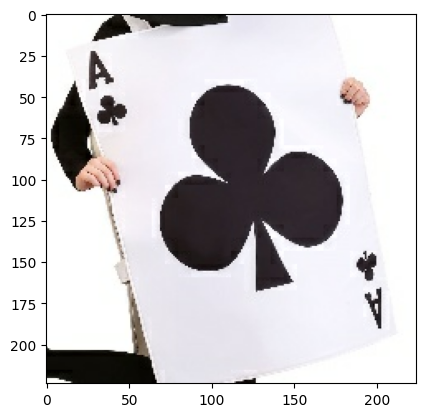

In [ ]:
print(f"amount of data in generator: {len(train_gen)}") #should be 7624
i = 0
for image, label in train_gen: #we can iterate though a generator
  i += 1
  if i == 1:
    plt.imshow(image)
    print(label)
    break
  print(image.shape) #(224, 224, 3)
  print(label.shape) #()

In [ ]:
i = 0
for images, label in train_ds: #we can also iterate though a dataset. if gives us our data in batches
  i += 1
  if i == 6:
    break
  print(images.shape) #(batch_size, crop_dims, crop_dims, 3)
  print(label.shape) #(batch_size,)

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


##Creating and Training our model


In [ ]:
input_shape = tf.TensorShape((224, 224, 3))

inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)  # Increased filter count
x = MaxPooling2D(2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Increased filter count
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(53, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=x)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=opt, loss=loss_func, metrics=['accuracy'])

history = model.fit(x = train_ds, validation_data=valid_ds, epochs=10, batch_size=32)

test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
239/239 [==============================] - 15s 52ms/step - loss: 3.2734 - accuracy: 0.2337 - val_loss: 3.8346 - val_accuracy: 0.1057
Epoch 2/10
239/239 [==============================] - 12s 52ms/step - loss: 2.1048 - accuracy: 0.4533 - val_loss: 2.4863 - val_accuracy: 0.3509
Epoch 3/10
239/239 [==============================] - 12s 51ms/step - loss: 1.4865 - accuracy: 0.6058 - val_loss: 1.1904 - val_accuracy: 0.7019
Epoch 4/10
239/239 [==============================] - 12s 52ms/step - loss: 1.0469 - accuracy: 0.7268 - val_loss: 0.9790 - val_accuracy: 0.7321
Epoch 5/10
239/239 [==============================] - 12s 52ms/step - loss: 0.7026 - accuracy: 0.8221 - val_loss: 0.7327 - val_accuracy: 0.8000
Epoch 6/10
239/239 [==============================] - 12s 51ms/step - loss: 0.5030 - accuracy: 0.8728 - val_loss: 0.6728 - val_accuracy: 0.8151
Epoch 7/10
239/239 [==============================] - 12s 51ms/step - loss: 0.3678 - accuracy: 0.9077 - val_loss: 0.7259 - val_accuracy: